## A Linear Regression example with numpy

In linear regression, our hypothesis function $h_\theta$ is:

$$h_\theta(x) = \theta_0 + \theta_1x$$

And, as we are doing regression, our cost function is: 

$$J(\theta_0,\theta_1) = \frac{1}{2m}\sum_{i=1}^m(\hat{y}_i-y_i)^2 = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x_i)-y_i)^2 $$

### Generate dummy data

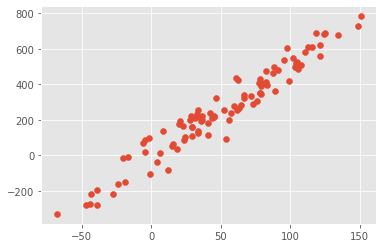

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

theta_0 = 2
theta_1 = 5

X=(np.random.randn(100)+1)*50    #Para obtener valores del valor de la decena
jitter = 50*np.random.randn(100) #Añadimos variabilidad a la ecuación, sino sería todo una línea recta
Y=theta_0+theta_1*X+jitter       #Datos para los que se ajustará la regresión

plt.scatter(X,Y)

### Write the cost function

In [3]:
#Escribimos la función de coste que tendremos que minimizar
def cost_function(X,Y):
    return lambda thetas: sum((thetas[0]+thetas[1]*X-Y)**2)/(2*len(X))

J=cost_function(X,Y)
J([theta_0,theta_1])

1767.8521978168055

In [4]:
from scipy.optimize import fmin

optimazed_points=fmin(J,[0,0])
optimazed_points

Optimization terminated successfully.
         Current function value: 1757.933343
         Iterations: 93
         Function evaluations: 173


array([-1.41935804,  5.09038348])

### Gradient descent

Remember, we have to descend in the direction of the steepest gradient. For that, we need to now what direction the gradient points!

#### Partial differentials of the cost function

$$\frac{\partial}{\partial\theta_0} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)$$

$$\frac{\partial}{\partial\theta_1} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i$$

In [5]:
def derivate_theta_0(X,Y):
    return lambda theta_0,theta_1: sum(theta_0+theta_1*X-Y)/len(X)
def derivate_theta_1(X,Y):
    return lambda theta_0,theta_1: sum((theta_0+theta_1*X-Y)*X)/len(X)

In [6]:
J_prime0=derivate_theta_0(X,Y)
J_prime1=derivate_theta_1(X,Y)

### Implementing gradient descent

Now we are ready to implement the actual gradient descent. Remember, the algorithm is:

- Initialize variables

- Compute cost function

- Compute gradients

- Update variables: gradient times learning rate (alpha)

- Repeat until convergence: cost at iteration n-1 $\sim$ cost at iteration n

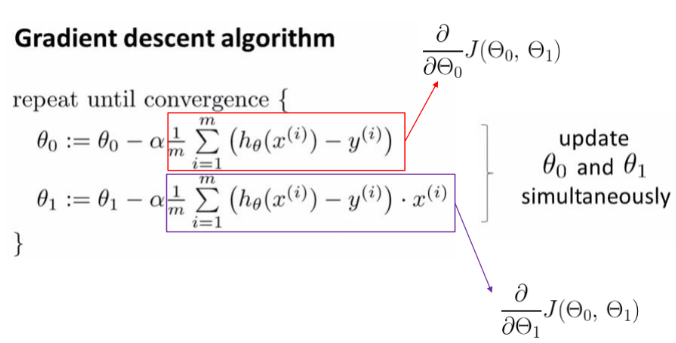

In [7]:
theta_0=np.random.randn()
theta_1=np.random.randn()
J_prime0=derivate_theta_0(X,Y)
J_prime1=derivate_theta_1(X,Y)
convergence_criteria=1e-6
converged=False
alpha=1e-4                     #Establece el orden de magnitud para la convergencia de theta
trace=[]

for i in range(1000):
    trace.append([theta_0,theta_1])
    
    J_0=J([theta_0,theta_1])
    
    diff_theta_0 = J_prime0(theta_0,theta_1)
    diff_theta_1 = J_prime1(theta_0,theta_1)
    
    theta_0 = theta_0 - alpha * diff_theta_0
    theta_1 = theta_1 - alpha * diff_theta_1
    
    J_1 = J([theta_0, theta_1])
            
    converged = abs(J_0 - J_1) < convergence_criteria 

In [8]:
len(trace)

1000

In [9]:
trace[-10:]

[[-0.04974771825931157, 5.075992637018906],
 [-0.04981117052862651, 5.075993303704181],
 [-0.04987461985820132, 5.075993970358569],
 [-0.049938066248172194, 5.075994636982071],
 [-0.05000150969867533, 5.075995303574688],
 [-0.05006495020984691, 5.075995970136422],
 [-0.0501283877818231, 5.075996636667274],
 [-0.0501918224147401, 5.075997303167246],
 [-0.050255254108734056, 5.075997969636339],
 [-0.05031868286394114, 5.075998636074555]]

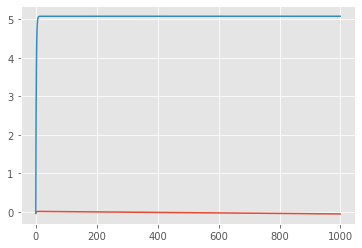

In [10]:
plt.plot(trace)

<a list of 11 text.Text objects>

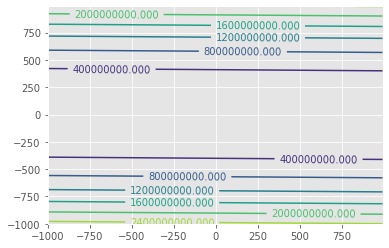

In [11]:
delta = 10
xs=np.arange(-1000,1000,delta)
ys=np.arange(-1000,1000,delta)

x,y = np.meshgrid(xs,ys)   #Asigna filas y columnas a x e y
zs=np.array([J([t0,t1]) for t0 in xs for t1 in ys]).reshape(len(xs),len(ys)).T 
#Volvemos a obtener la matriz pero con los valores de la función de costo para cada par de números. 
#Le damos forma cuadrada según los puntos que tenemos y hacemos la traspuesta para que salgan 
#horizontales los valores. No es horizontal 100% pero hay una variación muy pequeña.

m=plt.contour(x,y,zs) #Dibujamos los contornos con las coordenadas x e y y los valores zs
plt.clabel(m, inline=1, fontsize=10) #nos permite dibujar los valores en la línea

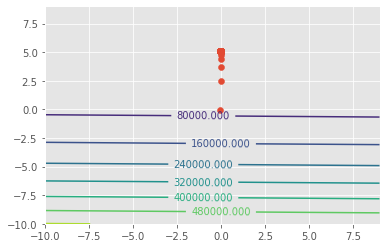

In [12]:
delta = 1
xs=np.arange(-10,10,delta)
ys=np.arange(-10,10,delta)

x,y = np.meshgrid(xs,ys)   #Asigna filas y columnas a x e y
zs=np.array([J([t0,t1]) for t0 in xs for t1 in ys]).reshape(len(xs),len(ys)).T 
#Volvemos a obtener la matriz pero con los valores de la función de costo para cada par de números. 
#Le damos forma cuadrada según los puntos que tenemos y hacemos la traspuesta para que salgan 
#horizontales los valores. No es horizontal 100% pero hay una variación muy pequeña a lo largo 
#de las iteraciones.

m=plt.contour(x,y,zs) #Dibujamos los contornos con las coordenadas x e y y los valores zs
plt.clabel(m, inline=1, fontsize=10) #nos permite dibujar los valores en la línea

x_steps=[step[0] for step in trace]
y_steps=[step[1] for step in trace]
plt.scatter(x_steps,y_steps) #Dibujamos los valores de theta_o y theta_1

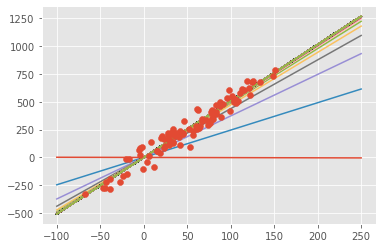

In [13]:
def make_line(theta_0,theta_1):
    xs=np.linspace(-100,250)
    ys=theta_0+theta_1*xs
    return xs,ys

lines=[plt.plot(*make_line(*thetas),zorder=1) for thetas in trace]
plt.scatter(X,Y,zorder=2)

__Fix our linear regression so that it can find $\theta_0$ in a reasonable length of time. What can be the problem?__

The problem is that we have defined an specific range for the iterations to get Thetas. It would be better to adjust it to a maximum difference between values. For that reason, we are using the parameter 'converged'. What we are doing is changing the expression:
- for i in range(1000)

to:
- while converged == False:

In that way, the iteration won't stop unless converged is less than a maximum value established by ourselfs. Also, doing this, we prevent the situation in which the value of Theta goes over and down again and again, which would make it harder to get an exact value. And, at last, it also will help to rich the desired value and not to stay away from it. 

In [14]:
theta_0=np.random.randn()
theta_1=np.random.randn()
J_prime0=derivate_theta_0(X,Y)
J_prime1=derivate_theta_1(X,Y)
convergence_criteria=1e-6
converged=False
alpha=1e-4                     #Establece el orden de magnitud para la convergencia de theta
trace=[]

while converged == False:
    trace.append([theta_0,theta_1])
    
    J_0=J([theta_0,theta_1])
    
    diff_theta_0 = J_prime0(theta_0,theta_1)
    diff_theta_1 = J_prime1(theta_0,theta_1)
    
    theta_0 = theta_0 - alpha * diff_theta_0
    theta_1 = theta_1 - alpha * diff_theta_1
    
    J_1 = J([theta_0, theta_1])
            
    converged = abs(J_0 - J_1) < convergence_criteria 

In [15]:
len(trace)

50743

In [16]:
trace[-10:]

[[-1.2034043645552048, 5.088113967070743],
 [-1.2034143679758407, 5.088114072175467],
 [-1.2034243709330186, 5.088114177275322],
 [-1.20343437342676, 5.088114282370307],
 [-1.2034443754570867, 5.088114387460423],
 [-1.2034543770240198, 5.08811449254567],
 [-1.203464378127581, 5.088114597626049],
 [-1.2034743787677913, 5.088114702701559],
 [-1.2034843789446725, 5.088114807772201],
 [-1.2034943786582462, 5.088114912837975]]

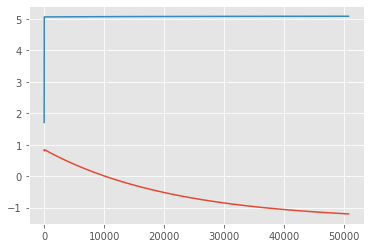

In [17]:
plt.plot(trace)

<a list of 12 text.Text objects>

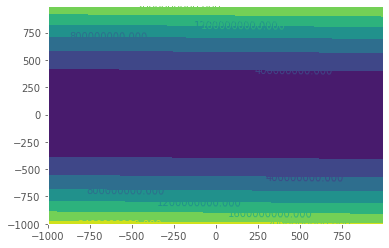

In [18]:
delta = 10
xs=np.arange(-1000,1000,delta)
ys=np.arange(-1000,1000,delta)

x,y = np.meshgrid(xs,ys)   #Asigna filas y columnas a x e y
zs=np.array([J([t0,t1]) for t0 in xs for t1 in ys]).reshape(len(xs),len(ys)).T 
#Volvemos a obtener la matriz pero con los valores de la función de costo para cada par de números. 
#Le damos forma cuadrada según los puntos que tenemos y hacemos la traspuesta para que salgan 
#horizontales los valores. No es horizontal 100% pero hay una variación muy pequeña.

m=plt.contourf(x,y,zs) #Dibujamos los contornos con las coordenadas x e y y los valores zs
plt.clabel(m, inline=1, fontsize=10) #nos permite dibujar los valores en la línea

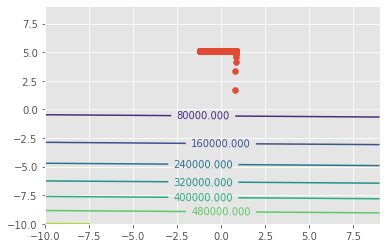

In [19]:
delta = 1
xs=np.arange(-10,10,delta)
ys=np.arange(-10,10,delta)

x,y = np.meshgrid(xs,ys)   #Asigna filas y columnas a x e y
zs=np.array([J([t0,t1]) for t0 in xs for t1 in ys]).reshape(len(xs),len(ys)).T 
#Volvemos a obtener la matriz pero con los valores de la función de costo para cada par de números. 
#Le damos forma cuadrada según los puntos que tenemos y hacemos la traspuesta para que salgan 
#horizontales los valores. No es horizontal 100% pero hay una variación muy pequeña a lo largo 
#de las iteraciones.

m=plt.contour(x,y,zs) #Dibujamos los contornos con las coordenadas x e y y los valores zs
plt.clabel(m, inline=1, fontsize=10) #nos permite dibujar los valores en la línea

x_steps=[step[0] for step in trace]
y_steps=[step[1] for step in trace]
plt.scatter(x_steps,y_steps) #Dibujamos los valores de theta_o y theta_1

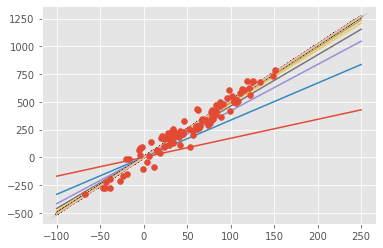

In [20]:
def make_line(theta_0,theta_1):
    xs=np.linspace(-100,250)
    ys=theta_0+theta_1*xs
    return xs,ys

lines=[plt.plot(*make_line(*thetas),zorder=1) for thetas in trace]
plt.scatter(X,Y,zorder=2)